In [63]:
import sys
sys.path.append("..")

import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from collections import Counter


from scripts.text_cleaning import clean_text, stop_words

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [62]:
df = pd.read_csv("../data/raw_analyst_ratings.csv")
news_df = df.copy()
# news_df = df.sample(n=10000, random_state=42)


In [43]:
print("Basic Understanding of the dataset")
print(news_df.info())
print(news_df.head(2))

Basic Understanding of the dataset
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1407328 entries, 0 to 1407327
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Unnamed: 0  1407328 non-null  int64 
 1   headline    1407328 non-null  object
 2   url         1407328 non-null  object
 3   publisher   1407328 non-null  object
 4   date        1407328 non-null  object
 5   stock       1407328 non-null  object
dtypes: int64(1), object(5)
memory usage: 64.4+ MB
None
   Unnamed: 0                                    headline  \
0           0     Stocks That Hit 52-Week Highs On Friday   
1           1  Stocks That Hit 52-Week Highs On Wednesday   

                                                 url          publisher  \
0  https://www.benzinga.com/news/20/06/16190091/s...  Benzinga Insights   
1  https://www.benzinga.com/news/20/06/16170189/s...  Benzinga Insights   

                        date stock  
0  2020-06-05 

In [44]:
print("Basic Statistics for Textual Lengths in 'headline' Column")

news_df["headline_word_count"] = news_df["headline"].astype(str).str.split().str.len()
news_df["headline_char_count"] = news_df["headline"].astype(str).str.len()

colums_to_describe = ["headline_char_count", "headline_word_count"]

print(news_df[colums_to_describe].describe())


Basic Statistics for Textual Lengths in 'headline' Column
       headline_char_count  headline_word_count
count         1.407328e+06         1.407328e+06
mean          7.312051e+01         1.141671e+01
std           4.073531e+01         6.352997e+00
min           3.000000e+00         1.000000e+00
25%           4.700000e+01         7.000000e+00
50%           6.400000e+01         1.000000e+01
75%           8.700000e+01         1.300000e+01
max           5.120000e+02         7.700000e+01


In [45]:
print("Top 10 Most Active Publishers Based on Article Count:")

top_publishers = (
    news_df.groupby("publisher")
    .agg(article_count=("headline", "count"))
    .sort_values("article_count", ascending=False)
    .head(10)
    .reset_index()
)

print(top_publishers)

Top 10 Most Active Publishers Based on Article Count:
           publisher  article_count
0      Paul Quintaro         228373
1         Lisa Levin         186979
2  Benzinga Newsdesk         150484
3      Charles Gross          96732
4      Monica Gerson          82380
5       Eddie Staley          57254
6         Hal Lindon          49047
7      ETF Professor          28489
8         Juan Lopez          28438
9     Benzinga Staff          28114


Publication Trends over time
date_clean
2009-02-14 00:00:00+00:00   2009-02-14 00:00:00+00:00
2009-04-27 00:00:00+00:00   2009-04-27 00:00:00+00:00
2009-04-27 00:00:00+00:00   2009-04-27 00:00:00+00:00
2009-04-29 00:00:00+00:00   2009-04-29 00:00:00+00:00
2009-05-22 00:00:00+00:00   2009-05-22 00:00:00+00:00
2009-05-27 00:00:00+00:00   2009-05-27 00:00:00+00:00
2009-05-27 00:00:00+00:00   2009-05-27 00:00:00+00:00
2009-05-27 00:00:00+00:00   2009-05-27 00:00:00+00:00
2009-05-27 00:00:00+00:00   2009-05-27 00:00:00+00:00
2009-05-27 00:00:00+00:00   2009-05-27 00:00:00+00:00
2009-05-27 00:00:00+00:00   2009-05-27 00:00:00+00:00
2009-05-29 00:00:00+00:00   2009-05-29 00:00:00+00:00
2009-05-29 00:00:00+00:00   2009-05-29 00:00:00+00:00
2009-05-30 00:00:00+00:00   2009-05-30 00:00:00+00:00
2009-05-30 00:00:00+00:00   2009-05-30 00:00:00+00:00
2009-05-30 00:00:00+00:00   2009-05-30 00:00:00+00:00
2009-06-01 00:00:00+00:00   2009-06-01 00:00:00+00:00
2009-06-01 00:00:00+00:00   2009-06-01 00:

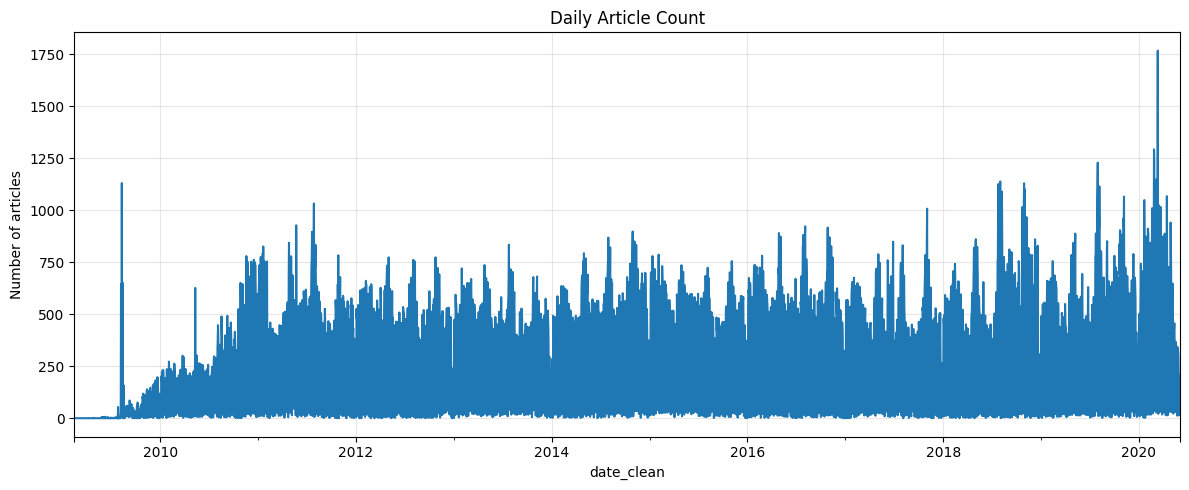

Plotting Monthly Article Counts Over Time


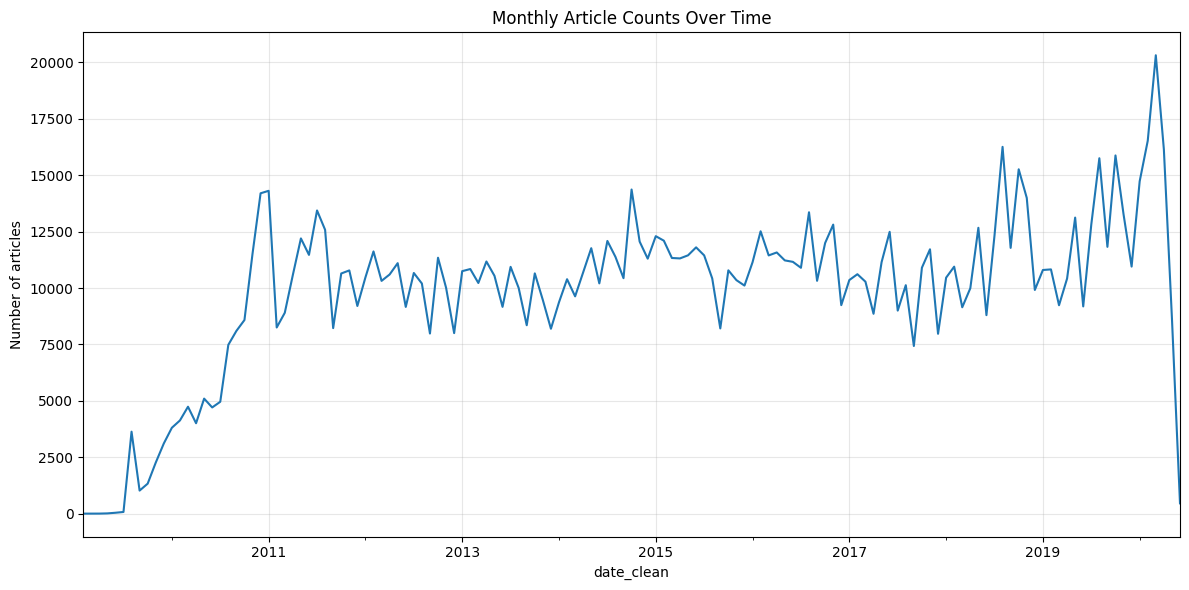

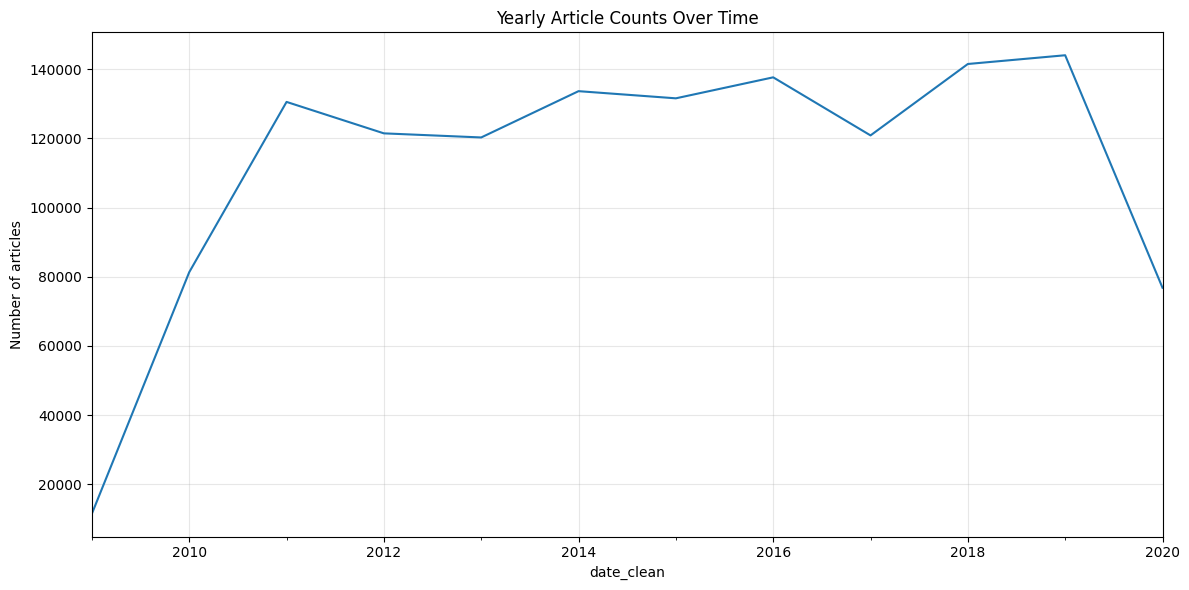

In [ ]:
print("Publication Trends over time")

news_df["date_clean"] = pd.to_datetime(news_df["date"], format="mixed", utc=True, errors="coerce")

news_df = news_df.set_index("date_clean").sort_index()

print("Plotting Daily Article Counts Over Time")
daily_counts = news_df.resample("D").size()
daily_counts.plot(figsize=(12, 5), title="Daily Article Count")
plt.ylabel("Number of articles")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()


print("Plotting Monthly Article Counts Over Time")
monthly_counts = news_df.resample("ME").size()
monthly_counts.plot(figsize=(12, 6), title="Monthly Article Counts Over Time")
plt.ylabel("Number of articles")
plt.tight_layout()
plt.grid(True, alpha=0.3)
plt.show()


yearly_counts = news_df.resample("YE").size()
yearly_counts.plot(figsize=(12, 6), title="Yearly Article Counts Over Time")
plt.ylabel("Number of articles")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Text Analysis most common words
Most common words in headlines:


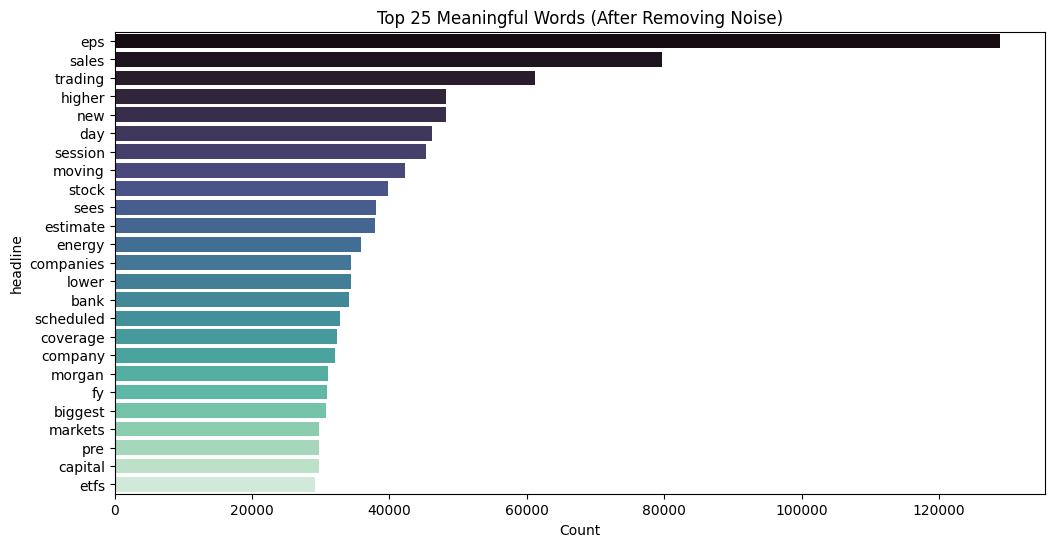

In [51]:
print("Text Analysis most common words")

headlines = news_df["headline"].dropna().apply(clean_text)

print("Most common words in headlines:")


words = headlines.str.split().explode()
words_clean = words[~words.isin(stop_words)]
words_clean = words_clean[words_clean.str.len() > 1]
real_words = words_clean.value_counts().head(25)

plt.figure(figsize=(12, 6))
sns.barplot(
    x=real_words.values, y=real_words.index, palette="mako", hue=real_words.index
)
plt.title("Top 25 Meaningful Words (After Removing Noise)")
plt.xlabel("Count")
plt.show()

In [52]:
print("Text Analysis most common phrases")


vectorizer = CountVectorizer(
    ngram_range=(2, 4),  
    min_df=20, 
    max_df=0.7,
)

X = vectorizer.fit_transform(headlines)
phrase_counts = pd.Series(X.sum(axis=0).A1, index=vectorizer.get_feature_names_out())
phrase_counts = phrase_counts.sort_values(ascending=False)

print("Top 10 Two-Word Phrases:")
print(phrase_counts.head(10))



Text Analysis most common phrases
Top 10 Two-Word Phrases:
companies trading    23340
trading higher       22951
adj eps              21723
pre session          21666
eps sales            20743
trading lower        20099
biggest movers       17795
eps revenue          16852
set new              16801
morgan stanley       15835
dtype: int64


In [54]:
print("Time series analysis")

threshold = daily_counts.mean() + 2 * daily_counts.std()
spike_days = daily_counts[daily_counts > threshold]

news_df["date_clean"] = pd.to_datetime(
    news_df["date"], format="mixed", utc=True, errors="coerce"
)
news_df["date_clean"] = news_df["date_clean"].dt.tz_localize(None)

daily_counts = news_df.groupby(news_df["date_clean"].dt.date).size()

threshold = daily_counts.mean() + 2 * daily_counts.std()
spike_days = daily_counts[daily_counts > threshold]

print(spike_days)

dates_series = pd.Series(news_df["date_clean"].dt.date, index=news_df.index)

spike_headlines = news_df[dates_series.isin(spike_days.index)]["headline"].dropna()

print("Headlines from Spike Days:")
print(spike_headlines.head(20))

Time series analysis
date_clean
2009-08-10    1130
2011-05-23     930
2011-07-28    1044
2016-08-04     943
2016-10-27     931
              ... 
2020-05-07    1398
2020-05-08     927
2020-05-13    1005
2020-05-26     967
2020-06-05     932
Length: 85, dtype: int64
Headlines from Spike Days:
date_clean
2009-08-10 00:00:00+00:00    TSX Venture Exchange Daily Bulletins for Augus...
2009-08-10 00:00:00+00:00    Globalive Wireless Harnesses the Power of Conv...
2009-08-10 00:00:00+00:00    Flow Goes Live With Voice Service in Grenada U...
2009-08-10 00:00:00+00:00      Defrag: Don't Be "Penny Wise and Pound Foolish"
2009-08-10 00:00:00+00:00          Gold Canyon Reviews Springpole Gold Project
2009-08-10 00:00:00+00:00    Castle Resources Begins New Drill Program at t...
2009-08-10 00:00:00+00:00    RothmanResearch.com Stock Review for CPN, ALK,...
2009-08-10 00:00:00+00:00    Wall Street News Alert: Monday's Stock in Focu...
2009-08-10 00:00:00+00:00    Baptist Health System Installs Seve

Analyzing Article Distribution by Day of the Week


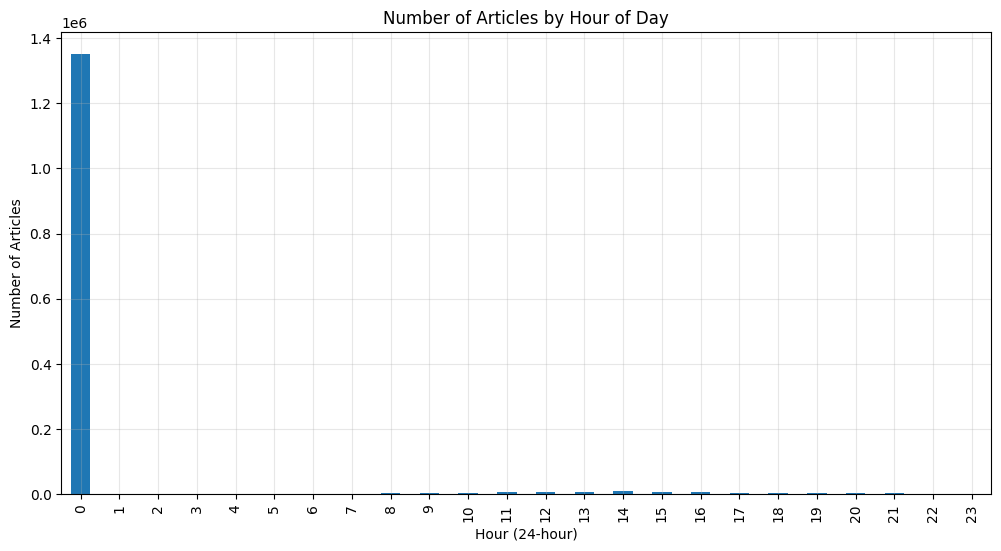

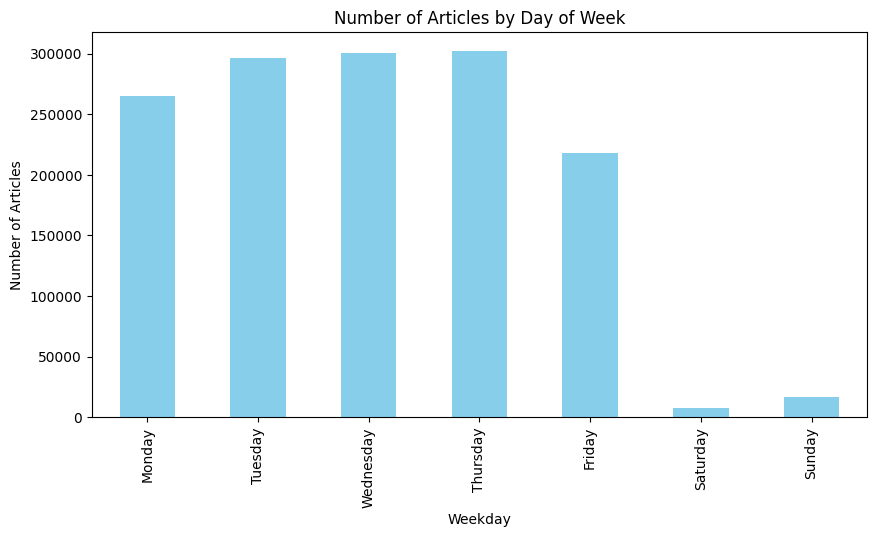

In [55]:
print("Analyzing Article Distribution by Day of the Week")

news_df["weekday"] = news_df["date_clean"].dt.day_name()
news_df["hour"] = news_df["date_clean"].dt.hour

hourly_counts = news_df.groupby("hour").size()
plt.figure(figsize=(12, 6))
hourly_counts.plot(kind="bar")
plt.title("Number of Articles by Hour of Day")
plt.xlabel("Hour (24-hour)")
plt.ylabel("Number of Articles")
plt.grid(alpha=0.3)
plt.show()


weekday_counts = news_df.groupby("weekday").size()
weekday_counts = weekday_counts[
    ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
] 

plt.figure(figsize=(10, 5))
weekday_counts.plot(kind="bar", color="skyblue")
plt.title("Number of Articles by Day of Week")
plt.xlabel("Weekday")
plt.ylabel("Number of Articles")
plt.show()

In [56]:
print(news_df["date"].head(10))
print(news_df["date_clean"].head(10))

date_clean
2009-02-14 00:00:00+00:00    2009-02-14 00:00:00
2009-04-27 00:00:00+00:00    2009-04-27 00:00:00
2009-04-27 00:00:00+00:00    2009-04-27 00:00:00
2009-04-29 00:00:00+00:00    2009-04-29 00:00:00
2009-05-22 00:00:00+00:00    2009-05-22 00:00:00
2009-05-27 00:00:00+00:00    2009-05-27 00:00:00
2009-05-27 00:00:00+00:00    2009-05-27 00:00:00
2009-05-27 00:00:00+00:00    2009-05-27 00:00:00
2009-05-27 00:00:00+00:00    2009-05-27 00:00:00
2009-05-27 00:00:00+00:00    2009-05-27 00:00:00
Name: date, dtype: object
date_clean
2009-02-14 00:00:00+00:00   2009-02-14
2009-04-27 00:00:00+00:00   2009-04-27
2009-04-27 00:00:00+00:00   2009-04-27
2009-04-29 00:00:00+00:00   2009-04-29
2009-05-22 00:00:00+00:00   2009-05-22
2009-05-27 00:00:00+00:00   2009-05-27
2009-05-27 00:00:00+00:00   2009-05-27
2009-05-27 00:00:00+00:00   2009-05-27
2009-05-27 00:00:00+00:00   2009-05-27
2009-05-27 00:00:00+00:00   2009-05-27
Name: date_clean, dtype: datetime64[ns]
